Définition du problème

Boston Housing Dataset , sa description est  disponible ici : Boston Housing data :https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

En gros ce jeu de données comprend le prix des maisons dans les différentes zones de Boston.
L’objectif sera de prédire le prix des maisons (variable expliquée) grâce aux différentes informations présentes dans le jeu de données (variables explicatives).

<h3>Analyse exploratoire des données (EDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston
donnees_boston = load_boston()
donnees_boston.keys()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [7]:
#On affiche la description du jeu de données
donnees_boston.DESCR.split("\n")

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

<h3>Préparation des données</h3>
On transforme notre jeu de données en un data frame et on vérifie qu’il n’y pas de valeurs nulles.

In [25]:
#Transformation de notre jeu de données en Data Frame grace à pandas
donnees_boston_df = pd.DataFrame(donnees_boston.data, columns=donnees_boston.feature_names)
#on affiche les 5 premières lignes
donnees_boston_df.head()
#on créé une nouvelle colonne qui est PRIX. ce qui equivaut à MEDV du jeu de données
donnees_boston_df['PRIX'] = donnees_boston.target
#on vérifie s'il n'y pas des valeurs nulles
donnees_boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRIX       0
dtype: int64

<h3>Création du modèle

<AxesSubplot:>

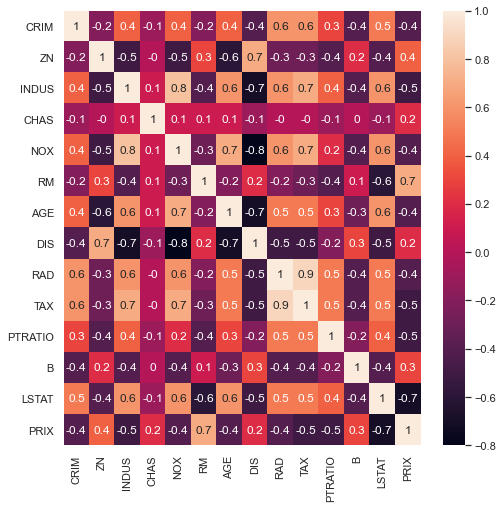

In [26]:
#etude de la correlation
matrice_corr = donnees_boston_df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

Le prix a une forte corrélation avec LSTAT et RM. Cependant il ne faut pas négliger les autres attributs comme CRIM,ZN,INDUS… car leur corrélation sont pas proches de 0. Il faut savoir que lorsqu’on fait une régression linéaire on pose certaines hypothèses notamment la Non-colinéarité des variables explicatives (une variable explicative ne doit pas pouvoir s’écrire comme combinaison linéaire des autres).

TAX et RAD ont une corrélation de 0.9; NOX et  DIS et AGE ont une corrélation de 0.7 ; DIS et INDUS ont une corrélation de 0.7.
Après une analyse minutieuse nous choisissons : LSAT, RM,TAX,PTRATIO

On utilise pour le modèle les variables choisies ci-dessus ensuite on divise notre jeu de données en 2 parties (80%, pour l’apprentissage et les 20% restant pour le test.

In [27]:
#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[donnees_boston_df['LSTAT'],donnees_boston_df['RM'],donnees_boston_df['TAX'],donnees_boston_df['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])
Y = donnees_boston_df['PRIX']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


On passe à l’étape suivante : l’entrainement du modèle ! Enfin

In [28]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

<h3>Évaluation du modèle de régression linéaire

In [29]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 5.303422189850911
le score R2 est 0.6725758894106004


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 4.897434387599151
le score R2 est 0.6936559148531671


<h1>La Régression polynomiale

exemple

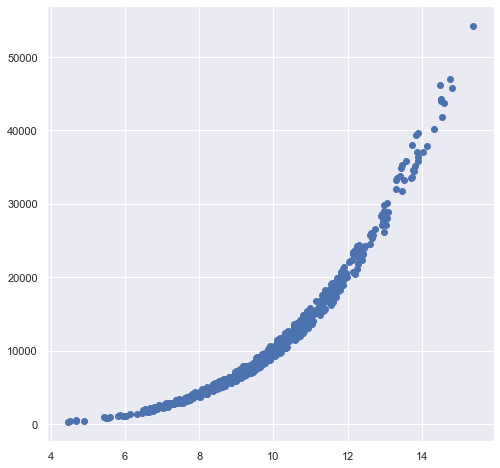

In [16]:
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = [8,8]
 
#plt.figure(figsize=(8,8))
 
 
np.random.seed(0)
#jeu de données sous la forme y = f(x)  avec f(x) = x^4 + bx^3 + c 
 
x = np.random.normal(10, 2, 500)
y = x ** 4 + np.random.uniform(-1, 1,500)*(x ** 3) + np.random.uniform(0, 1,500)
 
plt.scatter(x,y)
plt.show()

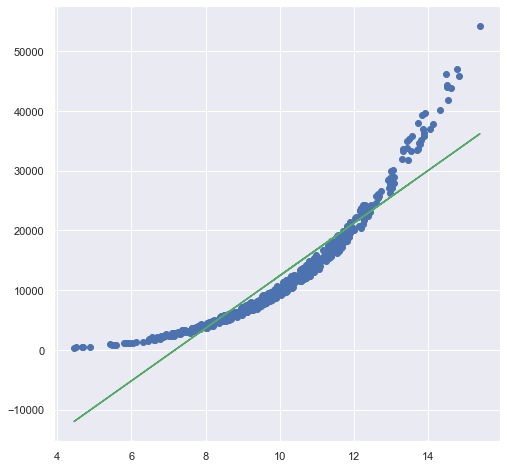

In [17]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
 
model.fit(x,y)
y_predict = model.predict(x)
 
plt.scatter(x, y)
plt.plot(x, y_predict, color='g')
plt.show()

polynomial

735.9164925748672


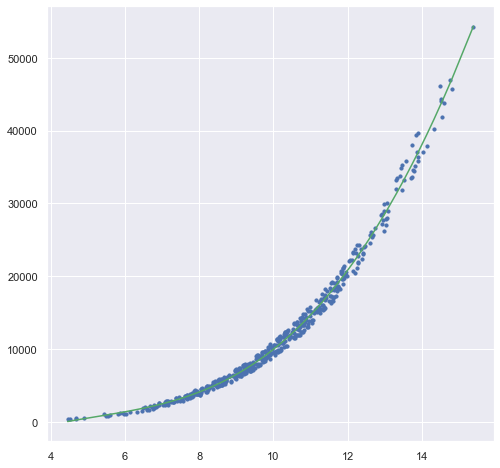

In [18]:
from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)
 
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
 
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
#r2 = r2_score(y,y_poly_pred)
print(rmse)
#print(r2)
import operator
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.plot(x_p, y_poly_pred_P, color='g')
plt.show()

Comprendre l’Over-fitting et l’Under-fitting

Une question qu’on peut se poser est : comment se fait le choix du degré du polynôme dans la régression polynomiale ? Nous allons profiter de cette question pour aborder deux notions très très très très importantes que sont l’under-fitting et l’over-fitting.

Nous allons tracer la courbe de l’erreur quadratique en fonction du degré du polynôme.

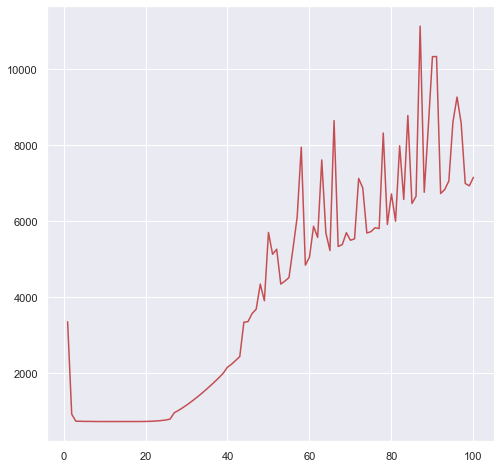

In [19]:
def degreeChoice (x,y,degree):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x_p, y_poly_pred_P = zip(*sorted_zip)
    return rmse, x_p, y_poly_pred_P
 
rmselist = np.zeros(100)
x_p_list = [None]*100
y_poly_pred_P_list=[None]*100
for i in np.arange(1, 101):
     
    rmselist[i-1] ,x_p_list[i-1],y_poly_pred_P_list[i-1]= degreeChoice (x,y,i)
     
plt.plot(np.arange(1, 101), rmselist, color='r')
plt.show()

On s’aperçoit que l’erreur de prédiction de notre modèle diminue considérablement jusqu’au degré 20 puis augmente subitement pour les ordres supérieurs. Regardons ça de plus près.

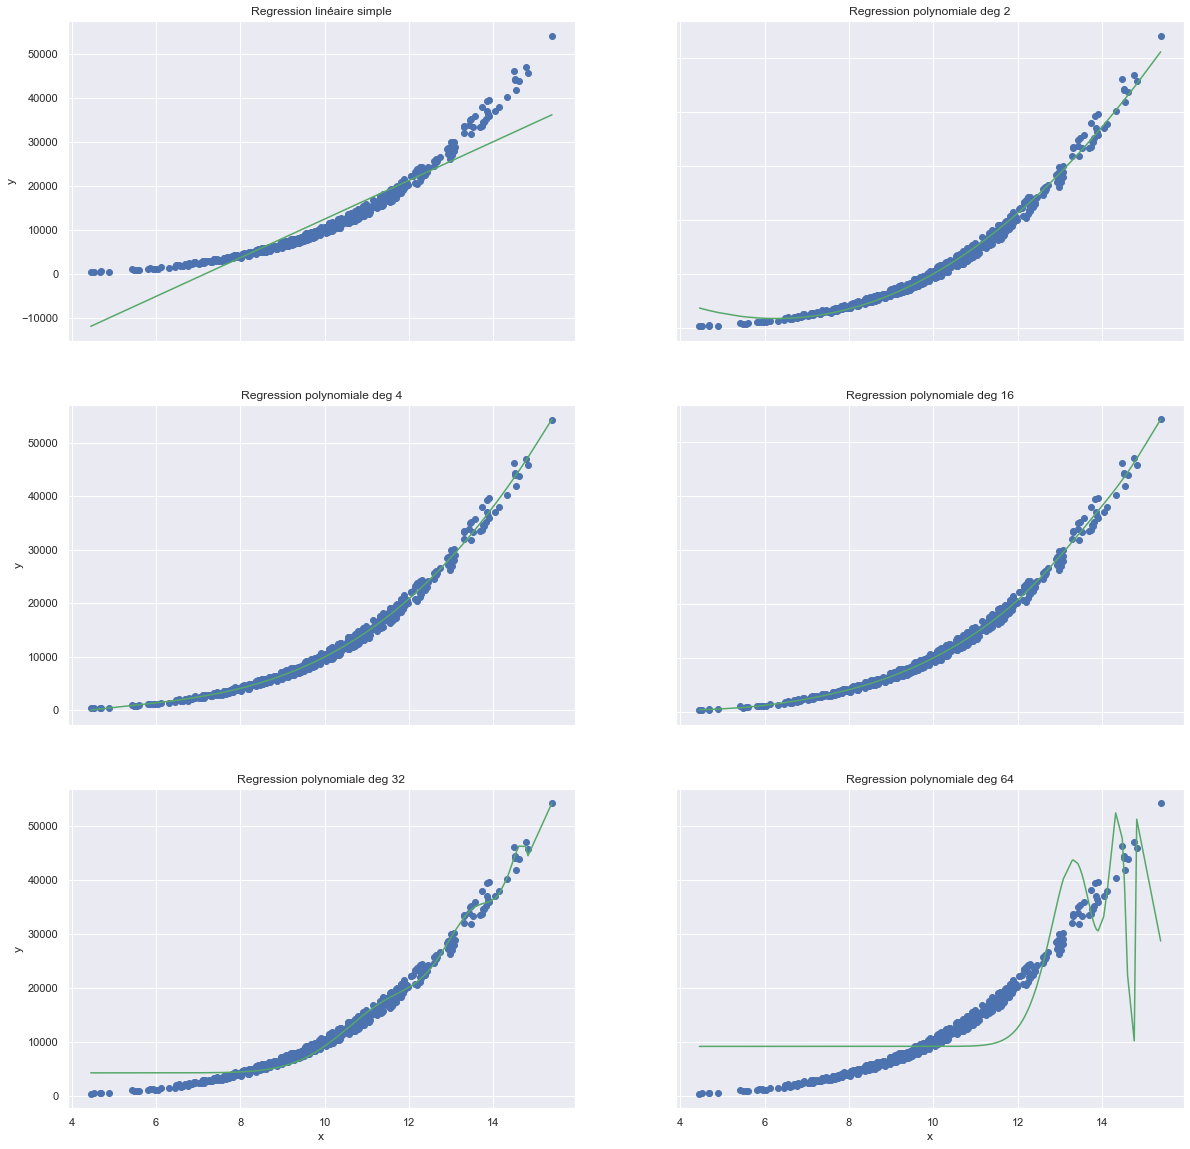

In [20]:
fig, axs = plt.subplots(3, 2,figsize=(20,20))
 
 
axs[0, 0].scatter(x, y)
axs[0, 0].plot(x_p_list[0],y_poly_pred_P_list[0],color='g')
axs[0, 0].set_title('Regression linéaire simple')
 
#degre 2
axs[0, 1].scatter(x, y)
axs[0, 1].plot(x_p_list[1],y_poly_pred_P_list[1],color='g')
axs[0, 1].set_title('Regression polynomiale deg 2')
 
 
#degre 4
axs[1, 0].scatter(x, y)
axs[1, 0].plot(x_p_list[3],y_poly_pred_P_list[3],color='g')
axs[1, 0].set_title('Regression polynomiale deg 4')
 
 
#degre 16
axs[1, 1].scatter(x, y)
axs[1, 1].plot(x_p_list[15],y_poly_pred_P_list[15],color='g')
axs[1, 1].set_title('Regression polynomiale deg 16')
 
#degre 32
axs[2, 0].scatter(x, y)
axs[2, 0].plot(x_p_list[31],y_poly_pred_P_list[31],color='g')
axs[2, 0].set_title('Regression polynomiale deg 32')
 
#degre 64
axs[2, 1].scatter(x, y)
axs[2, 1].plot(x_p_list[63],y_poly_pred_P_list[63],color='g')
axs[2, 1].set_title('Regression polynomiale deg 64')
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
 
for ax in axs.flat:
    ax.label_outer()

La régression polynomiale  sur le dataset bouston

In [30]:
#Transformation de notre jeu de données en Data Frame grace à pandas
#donnees_boston_df = pd.DataFrame(donnees_boston.data, columns=donnees_boston.feature_names)
 
donnees_boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRIX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[donnees_boston_df['LSTAT'],donnees_boston_df['RM'],donnees_boston_df['TAX'],donnees_boston_df['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])
Y = donnees_boston_df['PRIX']
  
#base d'apprentissage et base de test

  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


In [62]:
#on defintit la fonction pour entrainer et choisir notre modèle en fonction du degré du polynome
 
def evalPolynonmialRegression(degree):
    #entrainement du modèle
    polynomial_features= PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    model_ = LinearRegression()
    model_.fit(X_train_poly, Y_train)
    # Evaluation du training set
 
    y_train_predict = model_.predict(X_train_poly)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
 
    print('La performance du modèle sur la base dapprentissage')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    print('\n')
 
    # Evaluation du testing set
    y_test_predict = model_.predict(X_test_poly)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)
 
    print('La performance du modèle sur la base de test')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    return model_,r2 ,rmse,y_train_predict

In [114]:
model_,r2 ,rmse,y_train_predict=evalPolynonmialRegression(4)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 2.909547668449667
le score R2 est 0.9014516840201464


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 3.457121472349466
le score R2 est 0.8473483419281267
